In [1]:
import sys
sys.path.append('../')
import neurodynlib as nd
from brian2.units import *
import brian2 as b2
import matplotlib.pyplot as plt

#b2.codegen.target = 'numpy'

## Creating a neuron

In [2]:
x = nd.EifNeuron()  # try also with: EifNeuron, AdexNeuron, HodgkinHuxleyNeuron

In [3]:
x.get_neuron_equations()

dvm/dt = (DeltaT*gL*exp((-VT + vm)/DeltaT) + gL*(EL - vm))/C : volt (unless refractory)


Neurons are first given default parameters

In [4]:
x.get_neuron_parameters()

{'EL': -65. * mvolt,
 'V_res': -60. * mvolt,
 'VT': -55. * mvolt,
 'gL': 50. * nsiemens,
 'C': 0.6 * nfarad,
 'DeltaT': 2. * mvolt,
 'refractory_period': 2. * msecond,
 'Vcut': -30. * mvolt}

...and a name

In [5]:
x.neuron_name

'EifNeuron_20191031131218249379'

Every model includes a simple example

nr of spikes: 6


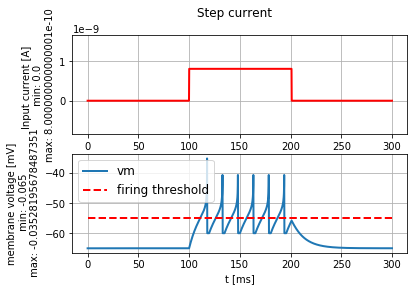

nr of spikes: 14


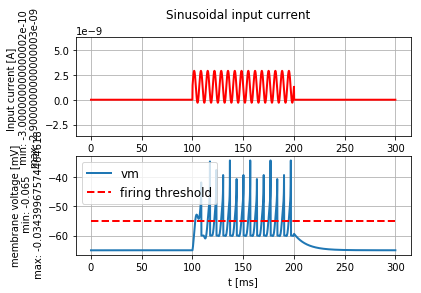

In [6]:
x.getting_started()

When you need more information on the model, you can ask:

In [7]:
x.what_is_this()

'http://neuronaldynamics.epfl.ch/online/Ch5.S2.html'

## Changing neuron parameters

In [8]:
x.set_neuron_parameters(C=100*pF)

In [9]:
x.get_neuron_parameters()

{'EL': -65. * mvolt,
 'V_res': -60. * mvolt,
 'VT': -55. * mvolt,
 'gL': 50. * nsiemens,
 'C': 100. * pfarad,
 'DeltaT': 2. * mvolt,
 'refractory_period': 2. * msecond,
 'Vcut': -30. * mvolt}

In [10]:
x.set_neuron_parameters(gL=5*nS, VT=-45*mV, V_res=-70*mV)

In [11]:
x.neuron_name = 'Layer5_BasketCell'

## Stimulating the neuron

In [12]:
input = nd.input_factory.get_step_current(t_start=100, t_end=200, unit_time=ms, amplitude=150*pA)
statemon, spikemon = x.simulate_neuron(I_stim=input, simulation_time=300*ms)

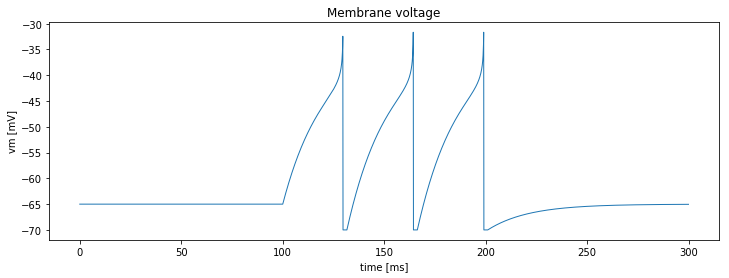

In [13]:
x.plot_states(statemon)

Try changing the neuron parameters, or the step current amplitude, and see how that affects the firing rate.

You can also see the full range of firing rates by plotting the frequency-current (f-I curve). See also example f-I curves in the [Neuronal Dynamics book](https://neuronaldynamics.epfl.ch/online/Ch2.S2.html#Ch2.F7):

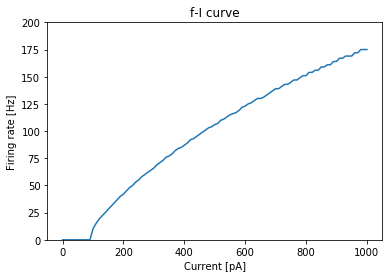

In [14]:
max_rate = 200
x.plot_fi_curve(max_rate=max_rate)

Change the parameters to see how they affect the f-I curve

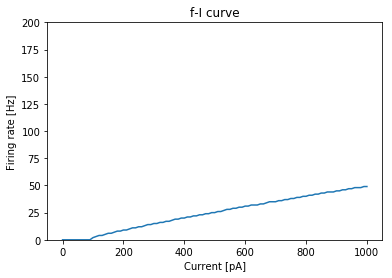

In [15]:
x.set_neuron_parameters(C=500*pF)
x.plot_fi_curve(max_rate=max_rate)

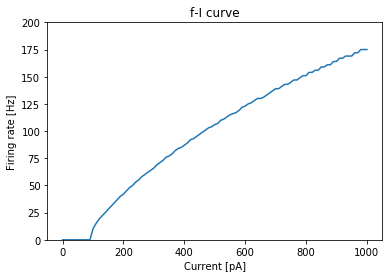

In [16]:
x.set_neuron_parameters(C=100*pF, g_leak=20*nS)
x.plot_fi_curve(max_rate=max_rate)